In [2]:
import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import sys
from PIL import Image
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook as tqdm
from scipy.fftpack import dct, idct
%matplotlib inline

In [15]:
class ImageLoader:
    def __init__(self,FILE_PATH):
            self.img = np.array(Image.open(FILE_PATH))
            
    def get_points(self,POINT):
        Row = random.randint(0,len(self.img)-POINT-1)
        Col = random.randint(0,len(self.img)-1)
        return self.img[Row:Row+POINT,Col]
    
    # ランチョスしたのを返す
    def Lanczos(self,data):
        points = len(data)
        left = int(data[0])
        right = int(data[len(data)-1])

        result = np.zeros(points)
        for i in range(points):
            result[i] = data[i] - ((right-left)*i/(points-1) + left)
            
        return result
    
    def get_points_lanczos(self,POINT):
        return self.Lanczos(self.get_points(POINT))

In [16]:
class DCT:
    def __init__(self,N):
        self.N = N # データ数
        # 1次元DCTの基底ベクトルの生成
        self.phi_1d = np.array([ self.phi(i) for i in range(self.N)])
                
    def phi(self,k):
        """ 離散コサイン変換(DCT)の基底関数 """
        # DCT-II
        if k == 0:
            return np.ones(self.N)/np.sqrt(self.N)
        else:
            return np.sqrt(2.0/self.N)*np.cos((k*np.pi/(2*self.N))*(np.arange(self.N)*2+1))
        
    def dct(self,data):
        """ 1次元離散コサイン変換を行う """
        return self.phi_1d.dot(data)

    def idct(self,c):
        """ 1次元離散コサイン逆変換を行う """
        return np.sum( self.phi_1d.T * c)

# 画像の用意

In [17]:
lenna = ImageLoader("LENNA.bmp")

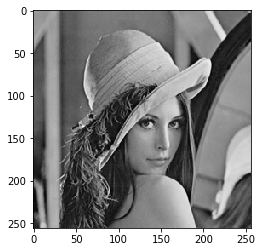

In [18]:
plt.imshow(lenna.img,"gray")

## ランダムでN点取得

In [19]:
point = lenna.get_points(8)

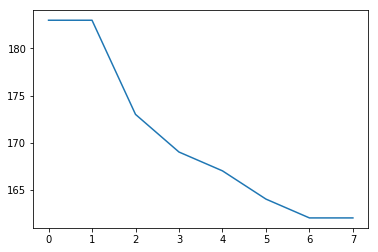

In [20]:
plt.plot(point)

## ランチョスしたやつ

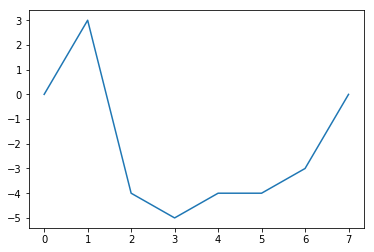

In [21]:
plt.plot(lenna.Lanczos(point))

# DCT

In [41]:
dct = DCT(8)

In [74]:
LOOP_COUNT = 1000000
img_F_DCT = np.zeros(8)
for i in tqdm(range(LOOP_COUNT)):
    img_F_DCT += abs(dct.dct(lenna.get_points(8)))
    
img_F_DCT /= LOOP_COUNT

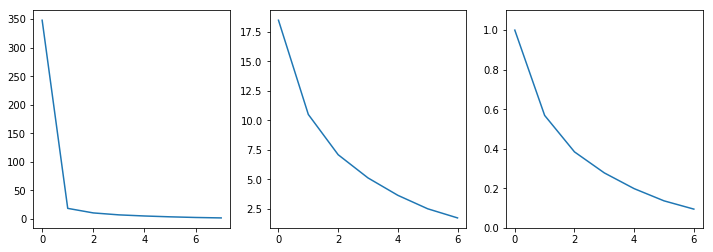

In [75]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax1.plot(img_F_DCT)
ax2 = fig.add_subplot(132)
ax2.plot(img_F_DCT[1:])
ax3 = fig.add_subplot(133)
ax3.set_ylim(0,1.1)
ax3.plot(img_F_DCT[1:]/img_F_DCT[1:].max())

# FFT

In [76]:
LOOP_COUNT = 1000000
img_F_FFT = np.zeros(16).astype(np.complex128)

for i in tqdm(range(LOOP_COUNT)):
    img_F_FFT += np.fft.fft(lenna.get_points(16))
    
img_F_FFT /= LOOP_COUNT

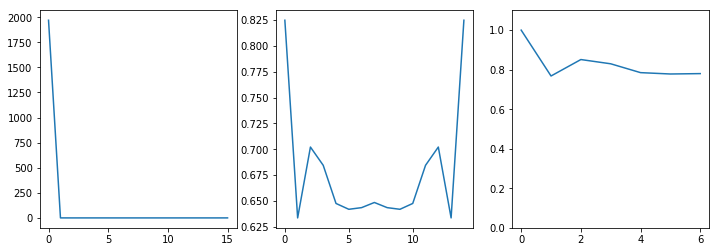

In [77]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax1.plot(img_F_FFT)
ax2 = fig.add_subplot(132)
ax2.plot(img_F_FFT[1:])
ax3 = fig.add_subplot(133)
ax3.set_ylim(0,1.1)
ax3.plot(img_F_FFT[1:8]/img_F_FFT[1:8].max().real)

In [60]:
img_F_FFT[1:].max().real

0.4184954422871909

FFTだからFs/2:ナイキスト周波数を堺に左右反転したようになる。
https://www.logical-arts.jp/archives/112

# DCT + ランチョス

In [72]:
LOOP_COUNT = 1000000
img_F_DCT_L = np.zeros(8)
for i in tqdm(range(LOOP_COUNT)):
    img_F_DCT_L += abs(dct.dct(lenna.get_points_lanczos(8)))
    
img_F_DCT_L /= LOOP_COUNT

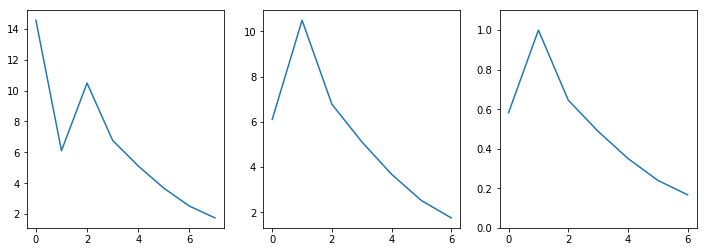

In [71]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax1.plot(img_F_DCT_L)
ax2 = fig.add_subplot(132)
ax2.plot(img_F_DCT_L[1:])
ax3 = fig.add_subplot(133)
ax3.set_ylim(0,1.1)
ax3.plot(img_F_DCT_L[1:]/img_F_DCT_L[1:].max())

# FFT + ランチョス

In [78]:
LOOP_COUNT = 1000000
img_F_FFT_L = np.zeros(16).astype(np.complex128)

for i in tqdm(range(LOOP_COUNT)):
    img_F_FFT_L += np.fft.fft(lenna.get_points_lanczos(16))
    
img_F_FFT_L /= LOOP_COUNT

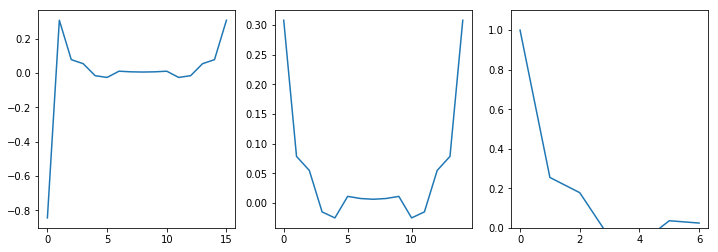

In [79]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax1.plot(img_F_FFT_L)
ax2 = fig.add_subplot(132)
ax2.plot(img_F_FFT_L[1:])
ax3 = fig.add_subplot(133)
ax3.set_ylim(0,1.1)
ax3.plot(img_F_FFT_L[1:8]/img_F_FFT_L[1:8].max().real)

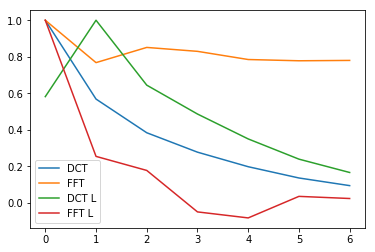

In [83]:
plt.plot(img_F_DCT[1:]/img_F_DCT[1:].max(),label="DCT")
plt.plot(img_F_FFT[1:8]/img_F_FFT[1:8].max().real,label="FFT")
plt.plot(img_F_DCT_L[1:]/img_F_DCT_L[1:].max(),label="DCT L")
plt.plot(img_F_FFT_L[1:8]/img_F_FFT_L[1:8].max().real,label="FFT L")
plt.legend()